In [3]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [5]:
# Load the dataset
data = pd.read_csv('C:\\Users\\NIVEDITA\\Downloads\\house_prices (1).csv')  
# Preview the dataset
print("First 5 rows:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())


First 5 rows:
   Size (sq ft)  Location  Number of Rooms  Price (in ₹ Lakhs)
0          1200     urban                3                  85
1           950  suburban                2                  60
2          1500     urban                4                 110
3           800     rural                2                  35
4          1750     urban                4                 125

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Size (sq ft)        20 non-null     int64 
 1   Location            20 non-null     object
 2   Number of Rooms     20 non-null     int64 
 3   Price (in ₹ Lakhs)  20 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 772.0+ bytes
None

Missing Values:
Size (sq ft)          0
Location              0
Number of Rooms       0
Price (in ₹ Lakhs)    0
dtype: int64


In [7]:
#Handle missing values
data['Size (sq ft)'] = data['Size (sq ft)'].fillna(data['Size (sq ft)'].median())
data['Number of Rooms'] = data['Number of Rooms'].fillna(data['Number of Rooms'].median())

# Drop rows where target variable is missing
data = data.dropna(subset=['Price (in ₹ Lakhs)'])

# Cap outliers in the target variable
upper_limit = data['Price (in ₹ Lakhs)'].quantile(0.95)
data['Price (in ₹ Lakhs)'] = np.where(data['Price (in ₹ Lakhs)'] > upper_limit, upper_limit, data['Price (in ₹ Lakhs)'])

# Encode categorical feature 'Location'
if 'Location' in data.columns:
    data = pd.get_dummies(data, columns=['Location'], drop_first=True)

print("\nDataset after encoding:")
print(data.head())

# Normalize numerical features
scaler = MinMaxScaler()
data[['Size (sq ft)', 'Number of Rooms']] = scaler.fit_transform(data[['Size (sq ft)', 'Number of Rooms']])


Dataset after encoding:
   Size (sq ft)  Number of Rooms  Price (in ₹ Lakhs)  Location_suburban  \
0          1200                3                85.0              False   
1           950                2                60.0               True   
2          1500                4               110.0              False   
3           800                2                35.0              False   
4          1750                4               125.0              False   

   Location_urban  
0            True  
1           False  
2            True  
3           False  
4            True  


In [9]:
# Split into input features and target variable
X = data.drop('Price (in ₹ Lakhs)', axis=1)
y = data['Price (in ₹ Lakhs)']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Output model parameters
print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nRoot Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")



Training set size: (16, 4)
Testing set size: (4, 4)

Model Coefficients: [41.16093997 28.921406   19.50434439 38.14899289]
Intercept: 23.382602685624

Root Mean Squared Error (RMSE): 4.96
R-squared (R²): 0.91


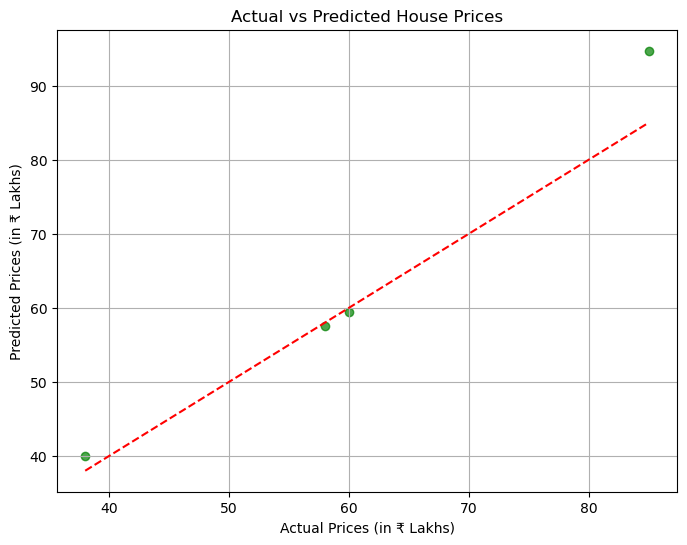

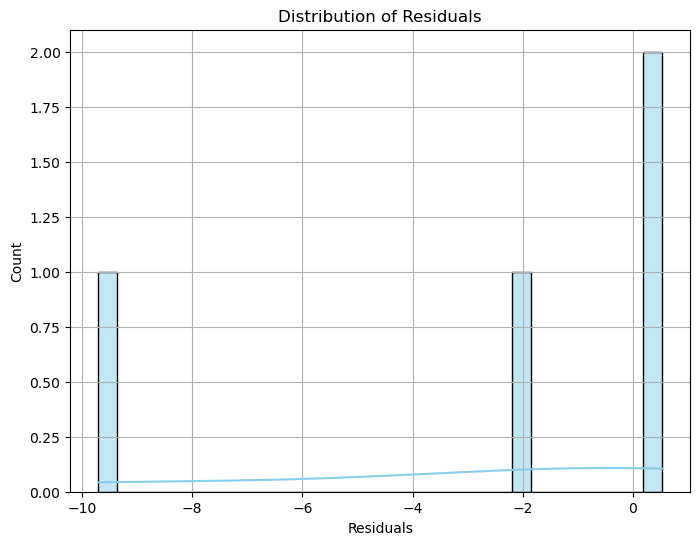

In [11]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.title("Actual vs Predicted House Prices")
plt.xlabel("Actual Prices (in ₹ Lakhs)")
plt.ylabel("Predicted Prices (in ₹ Lakhs)")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

# Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()